In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("./train.csv")
display(df_train.head())

id  Age  Gender  T_Bil  D_Bil    ALP  ALT_GPT  AST_GOT   TP  Alb  AG_ratio  \
0   0   60    Male    2.9    1.3  170.9     42.1     37.1  5.5  2.9      1.01   
1   1   28  Female    0.7    0.1  158.8     26.0     23.9  6.4  3.7      1.36   
2   2   60    Male   23.1   12.5  962.0     53.0     40.9  6.8  3.3      0.96   
3   3   20    Male    1.0    0.5  415.9     33.9     39.0  7.0  3.8      1.31   
4   4   44  Female    0.6    0.3  152.9     40.9     42.0  4.5  2.1      1.04   

   disease  
0        1  
1        0  
2        1  
3        0  
4        0

In [47]:
#df_test = pd.read_csv("./test.csv")
df_result = pd.read_csv("./sample_submit.csv",header=None,index_col=False)
#display(df_test.head())
display(df_result.head())

0  1
0  891  0
1  892  0
2  893  1
3  894  1
4  895  1

In [9]:
print(df_train.isna().sum())
print(df_train.info())
print(df_train.shape)

id          0
Age         0
Gender      0
T_Bil       0
D_Bil       0
ALP         0
ALT_GPT     0
AST_GOT     0
TP          0
Alb         0
AG_ratio    4
disease     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        891 non-null    int64  
 1   Age       891 non-null    int64  
 2   Gender    891 non-null    object 
 3   T_Bil     891 non-null    float64
 4   D_Bil     891 non-null    float64
 5   ALP       891 non-null    float64
 6   ALT_GPT   891 non-null    float64
 7   AST_GOT   891 non-null    float64
 8   TP        891 non-null    float64
 9   Alb       891 non-null    float64
 10  AG_ratio  887 non-null    float64
 11  disease   891 non-null    int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 83.7+ KB
None
(891, 12)


In [10]:
print(df_test.isna().sum())
print(df_test.info())
print(df_test.shape)

id          0
Age         0
Gender      0
T_Bil       0
D_Bil       0
ALP         0
ALT_GPT     0
AST_GOT     0
TP          0
Alb         0
AG_ratio    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        382 non-null    int64  
 1   Age       382 non-null    int64  
 2   Gender    382 non-null    object 
 3   T_Bil     382 non-null    float64
 4   D_Bil     382 non-null    float64
 5   ALP       382 non-null    float64
 6   ALT_GPT   382 non-null    float64
 7   AST_GOT   382 non-null    float64
 8   TP        382 non-null    float64
 9   Alb       382 non-null    float64
 10  AG_ratio  382 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 33.0+ KB
None
(382, 11)


In [38]:
print(df_result.isna().sum())
print(df_result.info())
print(df_result.shape)

0    0
1    0
1    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       382 non-null    int64  
 1   1       382 non-null    int64  
 2   1       382 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 9.1 KB
None
(382, 3)


In [4]:
display(df_train[df_train["AG_ratio"].isna()])
df_train["AG_ratio"].fillna(df_train["Alb"] / (df_train["TP"] - df_train["Alb"]), inplace=True)
print(df_train.isna().sum())

id  Age Gender  T_Bil  D_Bil    ALP  ALT_GPT  AST_GOT   TP  Alb  \
31    31   75   Male    8.3    4.6  386.1     30.0     25.1  5.6  1.9   
278  278   29   Male    1.3    0.3   75.0     25.0     26.0  5.2  2.8   
495  495   49   Male    0.8    0.3  189.1     18.2     20.1  7.3  3.8   
648  648   64   Male    0.8    0.2  199.0     19.1     22.2  6.2  3.6   

     AG_ratio  disease  
31        NaN        1  
278       NaN        1  
495       NaN        0  
648       NaN        0

id          0
Age         0
Gender      0
T_Bil       0
D_Bil       0
ALP         0
ALT_GPT     0
AST_GOT     0
TP          0
Alb         0
AG_ratio    0
disease     0
dtype: int64


In [12]:
print(df_train.duplicated().sum())

0


In [13]:
print(df_test.duplicated().sum())

0


In [16]:
print(df_train.describe(include='all'))

                id         Age Gender       T_Bil       D_Bil          ALP  \
count   891.000000  891.000000    891  891.000000  891.000000   891.000000   
unique         NaN         NaN      2         NaN         NaN          NaN   
top            NaN         NaN   Male         NaN         NaN          NaN   
freq           NaN         NaN    684         NaN         NaN          NaN   
mean    445.000000   43.340067    NaN    2.807856    1.256790   268.607071   
std     257.353842   16.647096    NaN    4.922115    2.578286   226.134887   
min       0.000000    3.000000    NaN    0.400000    0.100000    63.000000   
25%     222.500000   31.000000    NaN    0.800000    0.200000   170.450000   
50%     445.000000   44.000000    NaN    1.100000    0.400000   198.000000   
75%     667.500000   57.000000    NaN    2.100000    0.900000   279.000000   
max     890.000000   90.000000    NaN   43.200000   19.800000  2110.100000   

            ALT_GPT      AST_GOT          TP         Alb    AG_

In [17]:
df_train_0 = df_train[df_train["disease"]==0]
df_train_1 = df_train[df_train["disease"]==1]
display(df_train_0.head())
display(df_train_1.head())

id  Age  Gender  T_Bil  D_Bil    ALP  ALT_GPT  AST_GOT   TP  Alb  AG_ratio  \
1   1   28  Female    0.7    0.1  158.8     26.0     23.9  6.4  3.7      1.36   
3   3   20    Male    1.0    0.5  415.9     33.9     39.0  7.0  3.8      1.31   
4   4   44  Female    0.6    0.3  152.9     40.9     42.0  4.5  2.1      1.04   
7   7   37  Female    0.8    0.1  152.0     89.9     20.9  7.0  4.3      1.43   
8   8   41    Male    0.9    0.2  114.0     20.9     22.9  7.0  3.1      1.04   

   disease  
1        0  
3        0  
4        0  
7        0  
8        0

id  Age Gender  T_Bil  D_Bil    ALP  ALT_GPT  AST_GOT   TP  Alb  AG_ratio  \
0   0   60   Male    2.9    1.3  170.9     42.1     37.1  5.5  2.9      1.01   
2   2   60   Male   23.1   12.5  962.0     53.0     40.9  6.8  3.3      0.96   
5   5   62   Male   11.1    5.7  699.0     64.0    100.1  7.4  3.3      0.64   
6   6   32   Male   12.4    6.0  514.9     48.1     92.1  6.5  2.5      0.81   
9   9   14   Male    1.7    0.6  268.8     58.0     45.1  6.7  3.9      1.21   

   disease  
0        1  
2        1  
5        1  
6        1  
9        1

In [18]:
print(df_train_0.describe(include='all'))
print(df_train_1.describe(include='all'))

                id         Age Gender       T_Bil       D_Bil          ALP  \
count   460.000000  460.000000    460  460.000000  460.000000   460.000000   
unique         NaN         NaN      2         NaN         NaN          NaN   
top            NaN         NaN   Male         NaN         NaN          NaN   
freq           NaN         NaN    347         NaN         NaN          NaN   
mean    442.573913   41.006522    NaN    1.027174    0.342391   208.488913   
std     251.072230   16.721542    NaN    0.687248    0.372542    98.177537   
min       1.000000    3.000000    NaN    0.400000    0.100000    90.000000   
25%     224.750000   28.000000    NaN    0.700000    0.100000   162.000000   
50%     437.500000   41.000000    NaN    0.900000    0.200000   185.050000   
75%     658.250000   55.250000    NaN    1.100000    0.400000   205.800000   
max     890.000000   84.000000    NaN    7.000000    3.500000  1051.000000   

          ALT_GPT     AST_GOT          TP         Alb    AG_rat

In [11]:
display(df_train["Gender"].value_counts())
display(df_train_0["Gender"].value_counts())
display(df_train_1["Gender"].value_counts())

Male      684
Female    207
Name: Gender, dtype: int64

Male      347
Female    113
Name: Gender, dtype: int64

Male      337
Female     94
Name: Gender, dtype: int64

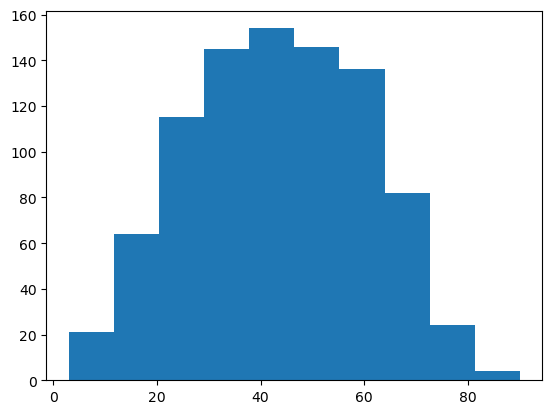

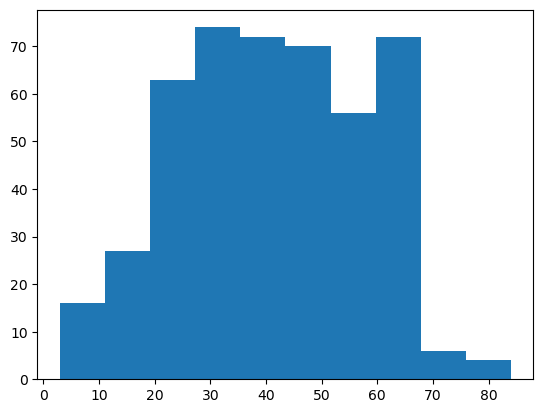

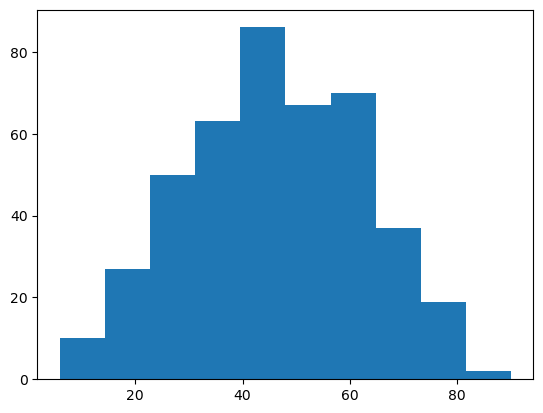

In [12]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train,x="Age",bins=10)
plt.show()
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train_0,x="Age",bins=10)
plt.show()
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data=df_train_1,x="Age",bins=10)
plt.show()

In [13]:
print(df_train.corr())

                id       Age     T_Bil     D_Bil       ALP   ALT_GPT  \
id        1.000000  0.049873  0.005274  0.002191  0.004649 -0.008899   
Age       0.049873  1.000000  0.023838  0.022956  0.043923 -0.068371   
T_Bil     0.005274  0.023838  1.000000  0.992112  0.256488  0.256965   
D_Bil     0.002191  0.022956  0.992112  1.000000  0.254928  0.236076   
ALP       0.004649  0.043923  0.256488  0.254928  1.000000  0.096297   
ALT_GPT  -0.008899 -0.068371  0.256965  0.236076  0.096297  1.000000   
AST_GOT  -0.013150 -0.043663  0.355203  0.328497  0.116894  0.866955   
TP       -0.051528 -0.211715 -0.014836 -0.014602 -0.023761 -0.005689   
Alb      -0.050070 -0.261470 -0.230144 -0.224510 -0.154299 -0.010086   
AG_ratio -0.041471 -0.129721 -0.255273 -0.246936 -0.192997 -0.003419   
disease   0.009745  0.144898  0.373955  0.366597  0.274803  0.218902   

           AST_GOT        TP       Alb  AG_ratio   disease  
id       -0.013150 -0.051528 -0.050070 -0.041471  0.009745  
Age      -0.0

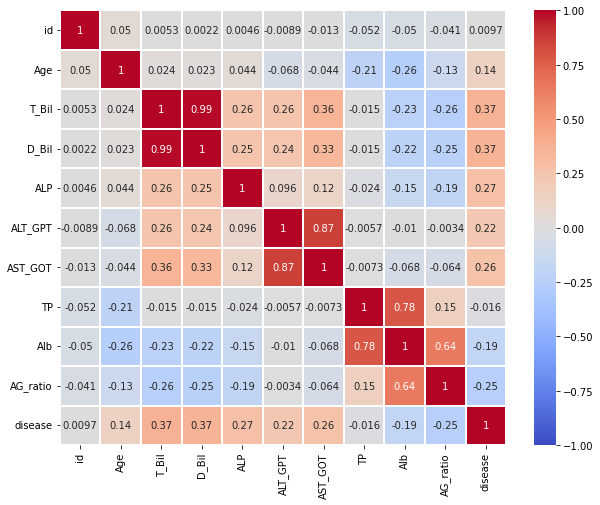

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()

In [5]:
df_Gender = df_train["Gender"].apply(lambda x: 1 if x == 'Male' else 0)
print(df_Gender.head())

0    1
1    0
2    1
3    1
4    0
Name: Gender, dtype: int64


In [16]:
df_train["Gender"] = df_train["Gender"].apply(lambda x: 1 if x=="Male" else 0)
display(df_train.head())
df_test["Gender"] = df_test["Gender"].apply(lambda x: 1 if x=="Male" else 0)
display(df_test.head())

id  Age  Gender  T_Bil  D_Bil    ALP  ALT_GPT  AST_GOT   TP  Alb  AG_ratio  \
0   0   60       0    2.9    1.3  170.9     42.1     37.1  5.5  2.9      1.01   
1   1   28       0    0.7    0.1  158.8     26.0     23.9  6.4  3.7      1.36   
2   2   60       0   23.1   12.5  962.0     53.0     40.9  6.8  3.3      0.96   
3   3   20       0    1.0    0.5  415.9     33.9     39.0  7.0  3.8      1.31   
4   4   44       0    0.6    0.3  152.9     40.9     42.0  4.5  2.1      1.04   

   disease  
0        1  
1        0  
2        1  
3        0  
4        0

id  Age  Gender  T_Bil  D_Bil    ALP  ALT_GPT  AST_GOT   TP  Alb  AG_ratio
0  891   65       0    0.7    0.2  162.0     24.0     20.0  6.4  3.3      0.93
1  892   46       1    1.2    0.3  265.1     40.0     28.0  7.9  3.8      0.94
2  893   26       1    0.7    0.1  243.1     21.1     22.9  5.3  2.2      0.60
3  894   38       1    3.5    1.7  253.0     80.0    406.0  6.8  3.7      1.33
4  895   46       0    0.7    0.2  236.0     10.1     13.0  6.8  3.0      0.74

In [7]:
df_X = df_train.drop(["disease"],axis=1)
df_y = df_train["disease"]
display(df_X.head())
display(df_y.head())


id  Age  Gender  T_Bil  D_Bil    ALP  ALT_GPT  AST_GOT   TP  Alb  AG_ratio
0   0   60       1    2.9    1.3  170.9     42.1     37.1  5.5  2.9      1.01
1   1   28       0    0.7    0.1  158.8     26.0     23.9  6.4  3.7      1.36
2   2   60       1   23.1   12.5  962.0     53.0     40.9  6.8  3.3      0.96
3   3   20       1    1.0    0.5  415.9     33.9     39.0  7.0  3.8      1.31
4   4   44       0    0.6    0.3  152.9     40.9     42.0  4.5  2.1      1.04

0    1
1    0
2    1
3    0
4    0
Name: disease, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [18]:
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,random_state=0,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 11)
(268, 11)
(623,)
(268,)


In [19]:
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [20]:
y_pred = lr.predict(X_test)
print(y_pred)

[0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1
 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0
 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 1 0 0 0 1 1 1 0 0]


In [36]:
result=lr.predict_proba(X_test)[:,1]
print(result[:5])

[0.21787955 0.21540547 0.20128619 0.99949109 0.2618278 ]


                 predict_Positive  predict_Negative
actual_Positive                85                52
actual_Negative                15               116


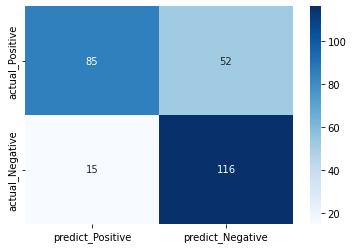

In [37]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
df_cm = pd.DataFrame(np.rot90(cm, 2), index=["actual_Positive", "actual_Negative"], columns=["predict_Positive", "predict_Negative"])
print(df_cm)
sns.heatmap(df_cm, annot=True, fmt="2g", cmap='Blues')
plt.yticks(va='center')
plt.show()

0.8492227113166546


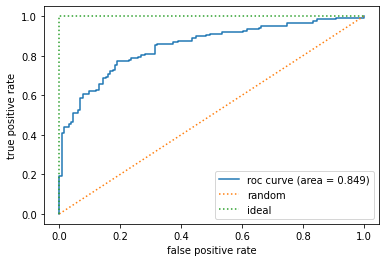

In [21]:
# モデルの予測（疾患あり(=1)に属する確率の算出）
y_pred_prob = lr.predict_proba(X_test)[:, 1]

# AUCスコアの算出
auc_score = roc_auc_score(y_true=y_test, y_score=y_pred_prob)
print(auc_score)

# ROC曲線の要素（偽陽性率、真陽性率、閾値）の算出
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob)

# ROC曲線の描画
plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc_score)
plt.plot([0, 1], [0, 1], linestyle=':', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [22]:
# 等間隔のbin分割
X_cut, bin_indice = pd.cut(df_X["T_Bil"], bins=5, retbins=True)

# bin分割した結果の表示
print("binの区切り: ", bin_indice)

print("--- bin区切りごとのデータ数 ---")
print(X_cut.value_counts())

# 等間隔のbin分割
X_cut, bin_indice = pd.cut(df_X["D_Bil"], bins=5, retbins=True)

# bin分割した結果の表示
print("binの区切り: ", bin_indice)

print("--- bin区切りごとのデータ数 ---")
print(X_cut.value_counts())

# 等間隔のbin分割
X_cut, bin_indice = pd.cut(df_X["ALP"], bins=5, retbins=True)

# bin分割した結果の表示
print("binの区切り: ", bin_indice)

print("--- bin区切りごとのデータ数 ---")
print(X_cut.value_counts())

# 等間隔のbin分割
X_cut, bin_indice = pd.cut(df_X["ALT_GPT"], bins=5, retbins=True)

# bin分割した結果の表示
print("binの区切り: ", bin_indice)

print("--- bin区切りごとのデータ数 ---")
print(X_cut.value_counts())

# 等間隔のbin分割
X_cut, bin_indice = pd.cut(df_X["AST_GOT"], bins=5, retbins=True)

# bin分割した結果の表示
print("binの区切り: ", bin_indice)

print("--- bin区切りごとのデータ数 ---")
print(X_cut.value_counts())


binの区切り:  [ 0.3572  8.96   17.52   26.08   34.64   43.2   ]
--- bin区切りごとのデータ数 ---
(0.357, 8.96]     828
(8.96, 17.52]      33
(17.52, 26.08]     21
(26.08, 34.64]      8
(34.64, 43.2]       1
Name: T_Bil, dtype: int64
binの区切り:  [ 0.0803  4.04    7.98   11.92   15.86   19.8   ]
--- bin区切りごとのデータ数 ---
(0.0803, 4.04]    821
(4.04, 7.98]       30
(7.98, 11.92]      25
(11.92, 15.86]     10
(15.86, 19.8]       5
Name: D_Bil, dtype: int64
binの区切り:  [  60.9529  472.42    881.84   1291.26   1700.68   2110.1   ]
--- bin区切りごとのデータ数 ---
(60.953, 472.42]      809
(472.42, 881.84]       57
(881.84, 1291.26]      13
(1291.26, 1700.68]      6
(1700.68, 2110.1]       6
Name: ALP, dtype: int64
binの区切り:  [   7.9097  407.96    806.02   1204.08   1602.14   2000.2   ]
--- bin区切りごとのデータ数 ---
(7.91, 407.96]        872
(407.96, 806.02]       10
(1602.14, 2000.2]       4
(806.02, 1204.08]       3
(1204.08, 1602.14]      2
Name: ALT_GPT, dtype: int64
binの区切り:  [   7.1641  597.28   1184.46   1771.64   2358.82   294

In [45]:
# 境界値を指定したbinの分割
bins_T_Bil = [0, 0.5, 1.0, 100]
X_cut, bin_indice = pd.cut(df_X["T_Bil"], bins=bins_T_Bil, retbins=True)

# bin分割した結果の表示
print("binの区切り: ", bin_indice)

print("--- bin区切りごとのデータ数 ---")
print(X_cut.value_counts())

# 境界値を指定したbinの分割
bins_D_Bil = [0, 0.5, 1.0, 100]
X_cut, bin_indice = pd.cut(df_X["D_Bil"], bins=bins_D_Bil, retbins=True)

# bin分割した結果の表示
print("binの区切り: ", bin_indice)

print("--- bin区切りごとのデータ数 ---")
print(X_cut.value_counts())

# 境界値を指定したbinの分割
bins_ALP = [0, 200, 400, 3000]
X_cut, bin_indice = pd.cut(df_X["ALP"], bins=bins_ALP, retbins=True)

# bin分割した結果の表示
print("binの区切り: ", bin_indice)

print("--- bin区切りごとのデータ数 ---")
print(X_cut.value_counts())

# 境界値を指定したbinの分割
bins_ALT_GPT = [0, 50, 100, 2000.2]
X_cut, bin_indice = pd.cut(df_X["ALT_GPT"], bins=bins_ALT_GPT, retbins=True)

# bin分割した結果の表示
print("binの区切り: ", bin_indice)

print("--- bin区切りごとのデータ数 ---")
print(X_cut.value_counts())

# 境界値を指定したbinの分割
bins_AST_GOT = [0, 50, 100, 2000.2]
X_cut, bin_indice = pd.cut(df_X["AST_GOT"], bins=bins_AST_GOT, retbins=True)

# bin分割した結果の表示
print("binの区切り: ", bin_indice)

print("--- bin区切りごとのデータ数 ---")
print(X_cut.value_counts())

binの区切り:  [  0.    0.5   1.  100. ]
--- bin区切りごとのデータ数 ---
(1.0, 100.0]    486
(0.5, 1.0]      378
(0.0, 0.5]       27
Name: T_Bil, dtype: int64
binの区切り:  [  0.    0.5   1.  100. ]
--- bin区切りごとのデータ数 ---
(0.0, 0.5]      583
(1.0, 100.0]    194
(0.5, 1.0]      114
Name: D_Bil, dtype: int64
binの区切り:  [   0  200  400 3000]
--- bin区切りごとのデータ数 ---
(0, 200]       466
(200, 400]     315
(400, 3000]    110
Name: ALP, dtype: int64
binの区切り:  [   0.    50.   100.  2000.2]
--- bin区切りごとのデータ数 ---
(0.0, 50.0]        662
(50.0, 100.0]      139
(100.0, 2000.2]     90
Name: ALT_GPT, dtype: int64
binの区切り:  [   0.    50.   100.  2000.2]
--- bin区切りごとのデータ数 ---
(0.0, 50.0]        575
(50.0, 100.0]      176
(100.0, 2000.2]    139
Name: AST_GOT, dtype: int64


In [33]:
# binの境界値を指定
bins_T_Bil = [0, 0.5, 1.0, 100]

# T_Bil列を分割し、0始まりの連番でラベル化した結果を、X_cutに格納する
X_cut_1, bin_indice = pd.cut(df_X["T_Bil"], bins=bins_T_Bil, retbins=True, labels=False)

# bin分割した結果をダミー変数化 (prefix=X_Cut.nameは、列名の接頭語を指定している)
X_dummies_1 = pd.get_dummies(X_cut_1, prefix=X_cut_1.name)

bins_D_Bil = [0, 0.5, 1.0, 100]

# T_Bil列を分割し、0始まりの連番でラベル化した結果を、X_cutに格納する
X_cut_2, bin_indice = pd.cut(df_X["D_Bil"], bins=bins_D_Bil, retbins=True, labels=False)

# bin分割した結果をダミー変数化 (prefix=X_Cut.nameは、列名の接頭語を指定している)
X_dummies_2 = pd.get_dummies(X_cut_2, prefix=X_cut_2.name)

bins_ALP = [0, 200, 400, 3000]

# T_Bil列を分割し、0始まりの連番でラベル化した結果を、X_cutに格納する
X_cut_3, bin_indice = pd.cut(df_X["ALP"], bins=bins_ALP, retbins=True, labels=False)

# bin分割した結果をダミー変数化 (prefix=X_Cut.nameは、列名の接頭語を指定している)
X_dummies_3 = pd.get_dummies(X_cut_3, prefix=X_cut_3.name)

bins_ALT_GPT = [0, 50, 100, 2000.2]

# T_Bil列を分割し、0始まりの連番でラベル化した結果を、X_cutに格納する
X_cut_4, bin_indice = pd.cut(df_X["ALT_GPT"], bins=bins_ALT_GPT, retbins=True, labels=False)

# bin分割した結果をダミー変数化 (prefix=X_Cut.nameは、列名の接頭語を指定している)
X_dummies_4 = pd.get_dummies(X_cut_4, prefix=X_cut_4.name)

bins_AST_GOT = [0, 50, 100, 2000.2]

# T_Bil列を分割し、0始まりの連番でラベル化した結果を、X_cutに格納する
X_cut_5, bin_indice = pd.cut(df_X["AST_GOT"], bins=bins_AST_GOT, retbins=True, labels=False)

# bin分割した結果をダミー変数化 (prefix=X_Cut.nameは、列名の接頭語を指定している)
X_dummies_5 = pd.get_dummies(X_cut_5, prefix=X_cut_5.name)



# 元の説明変数のデータフレーム(X)と、ダミー変数化の結果(X_dummies)を横連結
X_binned = pd.concat([df_X, X_dummies_1,X_dummies_2,X_dummies_3,X_dummies_4,X_dummies_5], axis=1)

# 結果の確認
print(X_binned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           891 non-null    int64  
 1   Age          891 non-null    int64  
 2   Gender       891 non-null    int64  
 3   T_Bil        891 non-null    float64
 4   D_Bil        891 non-null    float64
 5   ALP          891 non-null    float64
 6   ALT_GPT      891 non-null    float64
 7   AST_GOT      891 non-null    float64
 8   TP           891 non-null    float64
 9   Alb          891 non-null    float64
 10  AG_ratio     891 non-null    float64
 11  T_Bil_0      891 non-null    uint8  
 12  T_Bil_1      891 non-null    uint8  
 13  T_Bil_2      891 non-null    uint8  
 14  D_Bil_0      891 non-null    uint8  
 15  D_Bil_1      891 non-null    uint8  
 16  D_Bil_2      891 non-null    uint8  
 17  ALP_0        891 non-null    uint8  
 18  ALP_1        891 non-null    uint8  
 19  ALP_2   

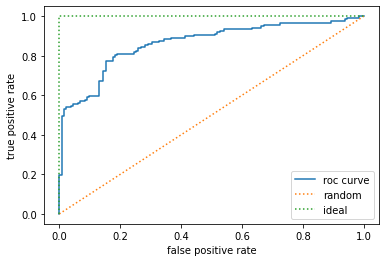

AUC: 0.8629297375605951


In [34]:
# 学習用・評価用データの分割（元の説明変数Xの代わりに、bin分割したX_binnedを使う）
X_train, X_test, y_train, y_test = train_test_split(X_binned, df_y, test_size=0.3, random_state=0)

# モデルの学習・予測
model = LogisticRegression(max_iter=6000)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]

# ROC曲線の描画（偽陽性率、真陽性率、閾値の算出）
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
plt.plot(fpr, tpr, label='roc curve')
plt.plot([0, 1], [0, 1], linestyle=':', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

# AUCスコアの算出
auc_score = roc_auc_score(y_true=y_test, y_score=y_pred)
print("AUC:", auc_score)

In [42]:
# binの境界値を指定
bins_T_Bil = [0, 0.5, 1.0, 100]

# T_Bil列を分割し、0始まりの連番でラベル化した結果を、X_cutに格納する
X_cut_1, bin_indice = pd.cut(df_test["T_Bil"], bins=bins_T_Bil, retbins=True, labels=False)

# bin分割した結果をダミー変数化 (prefix=X_Cut.nameは、列名の接頭語を指定している)
X_dummies_1 = pd.get_dummies(X_cut_1, prefix=X_cut_1.name)

bins_D_Bil = [0, 0.5, 1.0, 100]

# T_Bil列を分割し、0始まりの連番でラベル化した結果を、X_cutに格納する
X_cut_2, bin_indice = pd.cut(df_test["D_Bil"], bins=bins_D_Bil, retbins=True, labels=False)

# bin分割した結果をダミー変数化 (prefix=X_Cut.nameは、列名の接頭語を指定している)
X_dummies_2 = pd.get_dummies(X_cut_2, prefix=X_cut_2.name)

bins_ALP = [0, 200, 400, 3000]

# T_Bil列を分割し、0始まりの連番でラベル化した結果を、X_cutに格納する
X_cut_3, bin_indice = pd.cut(df_test["ALP"], bins=bins_ALP, retbins=True, labels=False)

# bin分割した結果をダミー変数化 (prefix=X_Cut.nameは、列名の接頭語を指定している)
X_dummies_3 = pd.get_dummies(X_cut_3, prefix=X_cut_3.name)

bins_ALT_GPT = [0, 50, 100, 2000.2]

# T_Bil列を分割し、0始まりの連番でラベル化した結果を、X_cutに格納する
X_cut_4, bin_indice = pd.cut(df_test["ALT_GPT"], bins=bins_ALT_GPT, retbins=True, labels=False)

# bin分割した結果をダミー変数化 (prefix=X_Cut.nameは、列名の接頭語を指定している)
X_dummies_4 = pd.get_dummies(X_cut_4, prefix=X_cut_4.name)

bins_AST_GOT = [0, 50, 100, 2000.2]

# T_Bil列を分割し、0始まりの連番でラベル化した結果を、X_cutに格納する
X_cut_5, bin_indice = pd.cut(df_test["AST_GOT"], bins=bins_AST_GOT, retbins=True, labels=False)

# bin分割した結果をダミー変数化 (prefix=X_Cut.nameは、列名の接頭語を指定している)
X_dummies_5 = pd.get_dummies(X_cut_5, prefix=X_cut_5.name)



# 元の説明変数のデータフレーム(X)と、ダミー変数化の結果(X_dummies)を横連結
X_binned = pd.concat([df_test, X_dummies_1,X_dummies_2,X_dummies_3,X_dummies_4,X_dummies_5], axis=1)

# 結果の確認
print(X_binned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           382 non-null    int64  
 1   Age          382 non-null    int64  
 2   Gender       382 non-null    int64  
 3   T_Bil        382 non-null    float64
 4   D_Bil        382 non-null    float64
 5   ALP          382 non-null    float64
 6   ALT_GPT      382 non-null    float64
 7   AST_GOT      382 non-null    float64
 8   TP           382 non-null    float64
 9   Alb          382 non-null    float64
 10  AG_ratio     382 non-null    float64
 11  T_Bil_0      382 non-null    uint8  
 12  T_Bil_1      382 non-null    uint8  
 13  T_Bil_2      382 non-null    uint8  
 14  D_Bil_0      382 non-null    uint8  
 15  D_Bil_1      382 non-null    uint8  
 16  D_Bil_2      382 non-null    uint8  
 17  ALP_0        382 non-null    uint8  
 18  ALP_1        382 non-null    uint8  
 19  ALP_2   

In [43]:
y_pred = model.predict(X_binned)
print(y_pred)
print(len(y_pred))
result = model.predict_proba(X_binned)[:, 1]
print(result[:5])

[0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0
 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0
 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0
 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 0]
382
[0.20578717 0.80598816 0.22563518 0.9772141  0.28325084]


In [48]:
df_result[1] = y_pred
display(df_result.head())

0  1
0  891  0
1  892  1
2  893  0
3  894  1
4  895  0

In [49]:
df_result.to_csv("./result.csv",header=None,index=False)